In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import gmaps
from config import googleKey
gmaps.configure(api_key=googleKey)

df = pd.read_csv("Output/cleaned_venue_data2.csv")
df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue ID,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State,Likes,Rating
0,Wakefield,40.894705,-73.847201,The Upper Room,4f57ef61e4b063a4ab675858,Music Venue,40.892567,-73.846406,NaN,NY,0.0,NaN
1,Wakefield,40.894705,-73.847201,Dyme Life Radio,4da63d645da3e8486b80546f,Music Venue,40.894541,-73.843266,Bronx,NY,0.0,NaN
2,Wakefield,40.894705,-73.847201,Par-City,4d23aea014f2b1f7740f68be,Music Venue,40.890211,-73.847002,Bronx,NY,0.0,NaN
3,Wakefield,40.894705,-73.847201,MY Studio,4e9cb64c49017c00c840e759,Music Venue,40.901926,-73.853504,NaN,NY,0.0,NaN
4,Wakefield,40.894705,-73.847201,Major League Music Group,4ee0764f0aafbb3dbab41e92,Music Venue,40.891367,-73.850088,NaN,NY,0.0,NaN


<IPython.core.display.Javascript object>


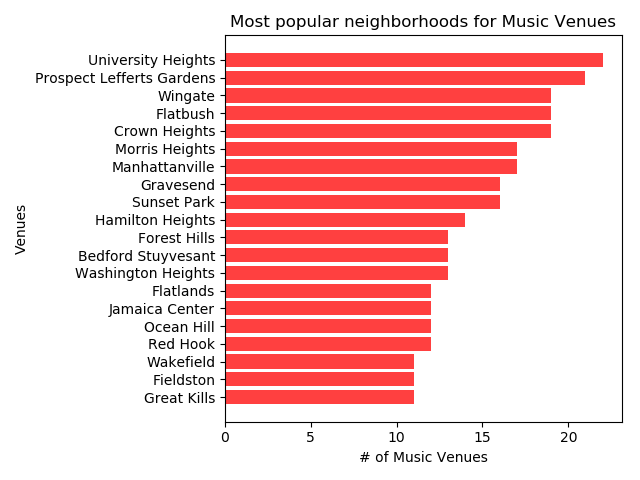

In [48]:
# 1 - What are the most popular neighborhoods for music venues in New York City? 
# rank neighborhoods in by count of venues bar chart

venue_count = df[['Neighborhood','Venue ID']].groupby('Neighborhood').count()
venue_count = venue_count.rename(columns={'Venue ID':'Venue Count'})
venue_count = venue_count.sort_values('Venue Count', ascending=True)
venue_count = venue_count.reset_index()
# venue_count.reset_index(key='Neighborhood', inplace = True)
venue_count = venue_count[-21 : -1]

y_axis = np.arange(0, 20)
tick_locations = []
for y in y_axis:
    tick_locations.append(y)

plt.title("Most popular neighborhoods for Music Venues")
plt.xlabel("# of Music Venues")
plt.ylabel("Venues")

# plt.xlim(-0.75, 0 -.25)
# plt.ylim(0, max(members) + 5)

# neighborhoods = venue_count['Neighborhood']
# neighborhoods
plt.barh(venue_count['Neighborhood'], venue_count['Venue Count'], facecolor="red", alpha=0.75, align="center")
plt.tight_layout()
plt.savefig("Output/Venue_Counts.png", bbox_inches="tight")
plt.show()

In [20]:
coordinates = [] 
for index, row in df.iterrows():
    x = row['Venue Latitude']
    y = row['Venue Longitude']
    coordinates.append((x, y))

[(40.892567, -73.846406),
 (40.894541333333336, -73.84326600000001),
 (40.89021141, -73.84700158),
 (40.901926, -73.853504),
 (40.891366689175385, -73.85008751159359),
 (40.898509567633404, -73.85535605954809),
 (40.899773517240966, -73.85714069379077),
 (40.89192, -73.85848399999998),
 (40.901604999999996, -73.85072),
 (40.88792277876211, -73.85368838260857),
 (40.897526, -73.859468),
 (40.87638087291421, -73.82909547946035),
 (40.881772739912755, -73.82673596188631),
 (40.87117330237115, -73.83684592174664),
 (40.882164671978714, -73.82759319234759),
 (40.868938, -73.84149599999998),
 (40.88202670940947, -73.83132401444647),
 (40.8918688, -73.82988590000002),
 (40.892331, -73.905058),
 (40.89045281501451, -73.90234248082983),
 (40.904354, -73.906013),
 (40.89824676513672, -73.89883422851562),
 (40.89017800000001, -73.89937900000002),
 (40.890182, -73.899381),
 (40.886617629570324, -73.91140241689857),
 (40.890147, -73.898519),
 (40.897222, -73.896831),
 (40.882785, -73.905243),
 (40.

In [21]:
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [22]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
embed_minimal_html('export.html', views=[fig])
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [49]:
# 2 - What are the most popular venues by neighborhood? 
embed_minimal_html('export.html', views=[fig])

NameError: name 'embed_minimal_html' is not defined

In [ ]:
# 3 - Which neighborhoods have the most highly rated/most liked venues? 


In [ ]:
# 4 - Which music venues have the most likes/highest ratings?